<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaJWG7PzF3toxaRMB1-JicpqMgJuEXATd0fg&" style="width: 150px;margin-top:30px;" align ="center">

<div style= "font-size: 40px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>To Grant or Not to Grant</center></div> <br>

<div style= "font-size: 27px;font-weight:bold;line-height: 1.1; margin-top:40px; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Machine Learning Project 2024/2025</center></div> <br>

   <div style= "font-size: 20px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center> Group 42:</center></div>
   <div><center> Eden da Silva | 20240740 </center></div>
   <div><center> José Cavaco | 20240513 </center></div>
   <div><center> Luana Rocha | 20240111 </center></div>
   <div><center> Maria Radix | 20240687 </center></div>
   <div><center> Tiago Castilho | 20240489 </center></div>

# Notebook 5: Feature Selection: MinMax Scaled Data

# Index

* [5.0. Imports](#imp)
* [5.1 Categorical Feature Selection: Chi-Squared](#cat)
* [5.2. Numerical Feature Selection](#num_feat)
    * [5.2.1. Filter Methods](#filter_m)
      * [5.2.1.1. Univariate Variables](#uni_m)
      * [5.2.1.2. Pearson and Spearman Correlation](#corr_m)
    * [5.2.2. Wrapper Methods: Recursive Feature Elimination (RFE)](#rfe_m)
    * [5.2.3. Embedded Methods: Lasso Regression](#emb_m)
    * [5.2.4 Tree Based Classifiers](#tree)
      * [5.2.4.1. ExtraTreesClassifier](#ex_m)
      * [5.2.4.1. RandomForest Classifier](#random_m)
* [5.3. Final Insights](#insights)
          
* [5.3 CSV Formatting, Exports](#exports)


<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="imp">
    
# **5.0. Imports**
 
</a>

Entering Feature Selection, we had four potential dataframes that we were interested in using in our models. They were as follows:
- MinMax Scaled data (no mathematical transformations of features)
- Standard Scaled data (no mathematical transformations of features)
- MinMax Scaled data with select features transformed using a Logarithmic transformation
- Standdard Scaled data with select features transformed using a Logarithmic transformation

We performed a separate feature selection on each of the dataframes above, and analyzed their performace in the models, both in predicting Claim Injury Type and Agreement Reached. Based on the results of our models and the Kaggle competition, the dataframe that lead to the best results was the **MinMax scaled data with logarithmic transformations**. The following code reflects the feature selection process for this dataset, with the original structure left in place to help with understanding our workflow. We commented out the imports for the data we did not need, and assigned our train, test, and validation data to generic names such as X_train, X_val, X_test. This allowed us to easily update the data being referenced as we tested our four dataframes.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
from IPython.display import display, Markdown

from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_classif

from sklearn.metrics import f1_score, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

In [6]:
#minmax
#df_train_minmax = pd.read_csv('df_train_minmax.csv', low_memory=False, index_col = 0)
#df_val_minmax = pd.read_csv('df_val_minmax.csv', low_memory=False, index_col = 0)
#df_test_stand_minmax = pd.read_csv('df_test_stand_minmax.csv', low_memory=False, index_col = 0)

#standard
#df_train_standard = pd.read_csv('df_train_standard.csv', low_memory=False, index_col = 0)
#df_val_standard = pd.read_csv('df_val_standard.csv', low_memory=False, index_col = 0)
#df_test_stand_standard = pd.read_csv('df_test_stand_standard.csv', low_memory=False, index_col = 0)

#log dfs: minmax
df_train_log_minmax = pd.read_csv('df_train_log_minmax.csv', low_memory=False, index_col = 0)
df_val_log_minmax = pd.read_csv('df_val_log_minmax.csv', low_memory=False, index_col = 0)
df_test_stand_log_minmax = pd.read_csv('df_test_log_stand_minmax.csv', low_memory=False, index_col = 0)

#log dfs: standard
#df_train_log_standard = pd.read_csv('df_train_log_minmax.csv', low_memory=False, index_col = 0)
#df_val_log_standard = pd.read_csv('df_val_log_minmax.csv', low_memory=False, index_col = 0)
#df_test_stand_log_standard = pd.read_csv('df_test_stand_log_standard.csv', low_memory=False, index_col = 0)

In [7]:
#making copies of the dfs
#minmax scaled
#df_train_minmax_fs = df_train_minmax.copy()
#df_val_minmax_fs = df_val_minmax.copy()
#df_test_minmax_fs = df_test_stand_minmax.copy()

#standard scaled
#df_train_standard_fs = df_train_standard.copy()
#df_val_standard_fs = df_val_standard.copy()
#df_test_standard_fs = df_test_stand_standard.copy()

#minmax sclaed, log transformed
df_train_log_minmax_fs = df_train_log_minmax.copy()
df_val_log_minmax_fs = df_val_log_minmax.copy()
df_test_log_minmax_fs = df_test_stand_log_minmax.copy()

#standard sclaed, log transformed
#df_train_log_standard_fs = df_train_log_standard.copy()
#df_val_log_standard_fs = df_val_log_standard.copy()
#df_test_log_standard_fs = df_test_stand_log_standard.copy()

In [8]:
#splitting X and y
#for untransformed
#X_train_minmax = df_train_minmax_fs.drop('Claim Injury Type', axis = 1)
#X_val_minmax = df_val_minmax_fs.drop('Claim Injury Type', axis = 1)

#X_train_standard = df_train_standard_fs.drop('Claim Injury Type', axis = 1)
#X_val_standard = df_val_standard_fs.drop('Claim Injury Type', axis = 1)

#for log transformed
X_train_log_minmax = df_train_log_minmax_fs.drop('Claim Injury Type', axis = 1)
X_val_log_minmax = df_val_log_minmax_fs.drop('Claim Injury Type', axis = 1)

#X_train_log_standard = df_train_log_standard_fs.drop('Claim Injury Type', axis = 1)
#X_val_log_standard = df_val_log_standard_fs.drop('Claim Injury Type', axis = 1)

#y is independent of scaling and transforming
y_train = df_train_log_minmax_fs['Claim Injury Type']
y_val = df_val_log_minmax_fs['Claim Injury Type']


In [9]:
X_train_log_minmax.head()

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Birth Year,C-3 Date,COVID-19 Indicator,First Hearing Date,IME-4 Count,Number of Dependents,Non-Zero Wage,Accident Date_IsWeekend,Accident Date in Days,Assembly Date in Days,C-2 Date in Days,Log Average Weekly Wage,Log Age_Wage_interaction,Log Accident to Assembly Days,Log Accident to C-2 Days,Carrier Name_freq,County of Injury_freq,WCIO Cause of Injury Code_freq,WCIO Nature of Injury Code_freq,WCIO Part Of Body Code_freq,Industry Code_freq,Carrier Type_2A. SIF,Carrier Type_3A. SELF PUBLIC,Carrier Type_4A. SELF PRIVATE,Carrier Type_5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A),Carrier Type_5C. SPECIAL FUND - POI CARRIER WCB MENANDS,Carrier Type_5D. SPECIAL FUND - UNKNOWN,Carrier Type_UNKNOWN,District Name_BINGHAMTON,District Name_BUFFALO,District Name_HAUPPAUGE,District Name_NYC,District Name_ROCHESTER,District Name_STATEWIDE,District Name_SYRACUSE,Gender_M,Gender_U,Gender_X,Medical Fee Region_1,Medical Fee Region_2,Medical Fee Region_3,Medical Fee Region_4,Cause of Injury_2.0,Cause of Injury_3.0,Cause of Injury_4.0,Cause of Injury_5.0,Cause of Injury_6.0,Cause of Injury_7.0,Cause of Injury_8.0,Cause of Injury_9.0,Cause of Injury_10.0,Cause of Injury_11.0,Nature of Injury_2.0,Nature of Injury_3.0,Nature of Injury_4.0,Nature of Injury_5.0,Nature of Injury_6.0,Nature of Injury_7.0,Nature of Injury_8.0,Nature of Injury_9.0,Nature of Injury_10.0,Nature of Injury_11.0,Nature of Injury_12.0,Nature of Injury_13.0,Part of Body_2.0,Part of Body_3.0,Part of Body_4.0,Part of Body_5.0,Part of Body_6.0,Part of Body_7.0,Part of Body_8.0,Part of Body_9.0,Part of Body_10.0,Age Group_Elderly,Age Group_Senior,Age Group_Teen,Accident Season_Spring,Accident Season_Summer,Accident Season_Winter
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5785935,0.523077,0,1,0.500000,1,0,0,0.057143,1.000000,1,0,0.911370,0.431935,0.666233,0.635703,0.632398,0.198291,0.197947,0.019880,0.963886,0.629123,0.235767,1.000000,0.080973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6090033,0.630769,0,1,0.430556,1,0,1,0.200000,0.833333,1,0,0.958170,0.731420,0.798634,0.656418,0.667531,0.230129,0.229729,0.004258,0.963886,0.358440,1.000000,0.114575,0.306909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6136197,0.507692,0,0,0.541667,0,0,0,0.000000,0.333333,0,0,0.964410,0.774099,0.817502,0.694729,0.678524,0.275001,0.274524,0.154082,0.149159,0.233292,0.719460,0.037385,0.306909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6019545,0.615385,0,0,0.416667,1,0,0,0.000000,0.333333,0,0,0.872429,0.663723,0.768705,0.694729,0.696843,0.718151,0.716905,0.115100,0.425141,0.711427,0.018245,0.362997,0.253377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5792247,0.584615,0,1,0.458333,1,0,1,0.000000,1.000000,1,0,0.912295,0.437822,0.668835,0.618212,0.628463,0.198291,0.197947,1.000000,0.224557,0.629123,0.719460,0.264914,0.358502,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [10]:
X_val_log_minmax.head()

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Birth Year,C-3 Date,COVID-19 Indicator,First Hearing Date,IME-4 Count,Number of Dependents,Non-Zero Wage,Accident Date_IsWeekend,Accident Date in Days,Assembly Date in Days,C-2 Date in Days,Log Average Weekly Wage,Log Age_Wage_interaction,Log Accident to Assembly Days,Log Accident to C-2 Days,Carrier Name_freq,County of Injury_freq,WCIO Cause of Injury Code_freq,WCIO Nature of Injury Code_freq,WCIO Part Of Body Code_freq,Industry Code_freq,Carrier Type_2A. SIF,Carrier Type_3A. SELF PUBLIC,Carrier Type_4A. SELF PRIVATE,Carrier Type_5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A),Carrier Type_5C. SPECIAL FUND - POI CARRIER WCB MENANDS,Carrier Type_5D. SPECIAL FUND - UNKNOWN,Carrier Type_UNKNOWN,District Name_BINGHAMTON,District Name_BUFFALO,District Name_HAUPPAUGE,District Name_NYC,District Name_ROCHESTER,District Name_STATEWIDE,District Name_SYRACUSE,Gender_M,Gender_U,Gender_X,Medical Fee Region_1,Medical Fee Region_2,Medical Fee Region_3,Medical Fee Region_4,Cause of Injury_2.0,Cause of Injury_3.0,Cause of Injury_4.0,Cause of Injury_5.0,Cause of Injury_6.0,Cause of Injury_7.0,Cause of Injury_8.0,Cause of Injury_9.0,Cause of Injury_10.0,Cause of Injury_11.0,Nature of Injury_2.0,Nature of Injury_3.0,Nature of Injury_4.0,Nature of Injury_5.0,Nature of Injury_6.0,Nature of Injury_7.0,Nature of Injury_8.0,Nature of Injury_9.0,Nature of Injury_10.0,Nature of Injury_11.0,Nature of Injury_12.0,Nature of Injury_13.0,Part of Body_2.0,Part of Body_3.0,Part of Body_4.0,Part of Body_5.0,Part of Body_6.0,Part of Body_7.0,Part of Body_8.0,Part of Body_9.0,Part of Body_10.0,Age Group_Elderly,Age Group_Senior,Age Group_Teen,Accident Season_Spring,Accident Season_Summer,Accident Season_Winter
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5947783,0.553846,0,0,0.486111,1,0,0,0.000000,0.333333,0,0,0.936908,0.596762,0.739102,0.694729,0.686682,0.243164,0.242742,0.000023,0.052752,0.257870,0.719460,0.810727,0.365411,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6150876,0.707692,0,1,0.361111,0,0,1,0.028571,0.333333,1,0,0.967298,0.789551,0.824333,0.694729,0.710776,0.230129,0.229729,1.000000,0.042931,1.000000,1.000000,0.729113,0.306909,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5397365,0.538462,0,1,0.361111,0,0,0,0.000000,0.166667,0,0,0.483245,0.005151,0.477228,0.694729,0.684018,0.890783,0.889202,0.001126,1.000000,0.257870,0.362903,0.481247,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6077399,0.600000,0,1,0.444444,1,0,1,0.142857,0.000000,1,0,0.932863,0.721118,0.796031,0.749867,0.740040,0.593327,0.595366,1.000000,0.083561,0.258811,0.719460,0.810727,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5945251,0.307692,0,0,0.708333,0,0,0,0.000000,0.000000,0,0,0.937023,0.592347,0.737150,0.694729,0.636022,0.076710,0.076576,0.125225,0.881962,0.711427,1.000000,0.156313,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:
df_test_log_minmax_fs.head()

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Birth Year,C-3 Date,COVID-19 Indicator,First Hearing Date,IME-4 Count,Number of Dependents,Non-Zero Wage,Accident Date_IsWeekend,Accident Date in Days,Assembly Date in Days,C-2 Date in Days,Log Average Weekly Wage,Log Age_Wage_interaction,Log Accident to Assembly Days,Log Accident to C-2 Days,Carrier Name_freq,County of Injury_freq,WCIO Cause of Injury Code_freq,WCIO Nature of Injury Code_freq,WCIO Part Of Body Code_freq,Industry Code_freq,Carrier Type_2A. SIF,Carrier Type_3A. SELF PUBLIC,Carrier Type_4A. SELF PRIVATE,Carrier Type_5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A),Carrier Type_5C. SPECIAL FUND - POI CARRIER WCB MENANDS,Carrier Type_5D. SPECIAL FUND - UNKNOWN,Carrier Type_UNKNOWN,District Name_BINGHAMTON,District Name_BUFFALO,District Name_HAUPPAUGE,District Name_NYC,District Name_ROCHESTER,District Name_STATEWIDE,District Name_SYRACUSE,Gender_M,Gender_U,Gender_X,Medical Fee Region_1,Medical Fee Region_2,Medical Fee Region_3,Medical Fee Region_4,Cause of Injury_2.0,Cause of Injury_3.0,Cause of Injury_4.0,Cause of Injury_5.0,Cause of Injury_6.0,Cause of Injury_7.0,Cause of Injury_8.0,Cause of Injury_9.0,Cause of Injury_10.0,Cause of Injury_11.0,Nature of Injury_2.0,Nature of Injury_3.0,Nature of Injury_4.0,Nature of Injury_5.0,Nature of Injury_6.0,Nature of Injury_7.0,Nature of Injury_8.0,Nature of Injury_9.0,Nature of Injury_10.0,Nature of Injury_11.0,Nature of Injury_12.0,Nature of Injury_13.0,Part of Body_2.0,Part of Body_3.0,Part of Body_4.0,Part of Body_5.0,Part of Body_6.0,Part of Body_7.0,Part of Body_8.0,Part of Body_9.0,Part of Body_10.0,Age Group_Elderly,Age Group_Senior,Age Group_Teen,Accident Season_Spring,Accident Season_Summer,Accident Season_Winter
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6165911,0.061538,0,0,0.944444,0,0,0,0.0,0.166667,1,1,0.969841,0.807211,0.832141,0.694729,0.553816,0.254824,0.254382,0.081648,0.653593,0.683948,0.719460,0.223829,0.306909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6166141,0.061538,0,0,0.944444,0,0,0,0.0,0.166667,1,1,0.965912,0.807211,0.832141,0.694729,0.553816,0.418791,0.418064,0.099984,0.963886,0.392339,0.719460,0.152081,0.147391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6165907,0.676923,0,0,0.388889,0,0,0,0.0,0.000000,0,0,0.970072,0.807211,0.831490,0.694729,0.706290,0.230129,0.197947,0.001689,0.425141,0.233292,0.362903,0.021474,0.172871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6166047,0.615385,0,0,0.444444,0,0,0,0.0,1.000000,0,0,0.970303,0.807211,0.832141,0.694729,0.696843,0.198291,0.197947,0.130023,0.963886,0.257870,0.719460,0.928929,0.306909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6166102,0.153846,0,0,0.861111,0,0,0,0.0,0.833333,0,0,0.969378,0.807211,0.831490,0.694729,0.590745,0.292061,0.274524,0.115100,0.881962,0.266547,0.306294,0.239910,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Our current data set has been scaled using MinMax scaler, and normalized using Logarithmic Transformation on select features. We will perform feature selection on this dataset. Before analyzing our scaled data, however, we will perform feature selection on our categorical features. To do this, we will import our datasets from before we encoded our categorical features. This is because tests like Chi-Squared are designed to handle categorical features and will return misleading results if run on our numerically encoded features.

For this notebook, all feature selection methods will be run on 'X_train' data. Below, we assign X_train to be any of the four datasets we have prepared.


In [14]:
#here we specificy which version of our data we will use
X_train = X_train_log_minmax.copy()
X_val = X_val_log_minmax.copy()
df_test = df_test_log_minmax_fs.copy()

In [15]:
# Get the columns that are in X_val but not in df_test_stand
diff_cols_train_test = set(X_train.columns) - set(df_test.columns)

# Get the columns that are in df_test_stand but not in X_val
diff_cols_test_train = set(df_test.columns) - set(X_train.columns)

print(diff_cols_train_test)
print(diff_cols_test_train)

set()
set()


<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="cat">
    
# **5.1 Categorical Feature Selection: Chi-Squared**
 
</a>

- The Chi-Square test is an ideal statistical method for this scenario because it directly evaluates the dependency between categorical features and the target variable. Since the features under consideration are categorical, the test provides a reliable way to measure the strength of the association between each feature and the target

In [18]:
# importing our datasets from before scaling and encoding (notebook 4)
df_train_fe = pd.read_csv('df_train_fe.csv',low_memory=False, index_col = 0)
df_val_fe = pd.read_csv('df_val_fe.csv',low_memory=False, index_col = 0)
df_test_fe = pd.read_csv('df_test_fe.csv',low_memory=False, index_col = 0)

In [19]:
df_train_fe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459181 entries, 5785935 to 6027959
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Accident Date                   459181 non-null  object 
 1   Age at Injury                   459181 non-null  float64
 2   Alternative Dispute Resolution  459181 non-null  int64  
 3   Assembly Date                   459181 non-null  object 
 4   Attorney/Representative         459181 non-null  int64  
 5   Average Weekly Wage             459181 non-null  float64
 6   Birth Year                      459181 non-null  float64
 7   C-2 Date                        459181 non-null  object 
 8   C-3 Date                        459181 non-null  int64  
 9   Carrier Name                    459181 non-null  object 
 10  Carrier Type                    459181 non-null  object 
 11  County of Injury                459181 non-null  object 
 12  COVID-19 Indic

In [20]:
#selecting only categorical features
cat_feats = df_train_fe[["Alternative Dispute Resolution", "Attorney/Representative", "C-3 Date", "Carrier Name",
    "Carrier Type", "County of Injury", "COVID-19 Indicator", "District Name", "Industry Code",
    "Gender", "Medical Fee Region", "WCIO Cause of Injury Code",
    "WCIO Nature of Injury Code", "WCIO Part Of Body Code",
    "Cause of Injury", "Nature of Injury", "Part of Body", "Age Group",
    "Accident Season", "Accident Date_IsWeekend", "First Hearing Date", "Non-Zero Wage"]]

In [21]:
# first examining categorical variables
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [22]:
for var in cat_feats:
    TestIndependence(cat_feats[var],df_train_fe['Claim Injury Type'], var)

Alternative Dispute Resolution is IMPORTANT for Prediction
Attorney/Representative is IMPORTANT for Prediction
C-3 Date is IMPORTANT for Prediction
Carrier Name is IMPORTANT for Prediction
Carrier Type is IMPORTANT for Prediction
County of Injury is IMPORTANT for Prediction
COVID-19 Indicator is IMPORTANT for Prediction
District Name is IMPORTANT for Prediction
Industry Code is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
Medical Fee Region is IMPORTANT for Prediction
WCIO Cause of Injury Code is IMPORTANT for Prediction
WCIO Nature of Injury Code is IMPORTANT for Prediction
WCIO Part Of Body Code is IMPORTANT for Prediction
Cause of Injury is IMPORTANT for Prediction
Nature of Injury is IMPORTANT for Prediction
Part of Body is IMPORTANT for Prediction
Age Group is IMPORTANT for Prediction
Accident Season is IMPORTANT for Prediction
Accident Date_IsWeekend is IMPORTANT for Prediction
First Hearing Date is IMPORTANT for Prediction
Non-Zero Wage is IMPORTANT for Prediction

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="chi">
    
## Conclusion: Chi-Square 
 
</a>
- According to the results of our Chi-Squared test, all features are important and we should not drop any from our model.

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="num_feat">
    
# **5.2. Numerical Feature Selection**
 
</a>

We will move on to feature selectino methods that analyze numerical features. This includes, in some cases, categorical features that have been numerically encoded. The types of features included in each method are as follows:  
- Univariate Analysis: All features (numerical, frequency encoded, one-hot encoded)
- Pearson and Spearman Correlations: Numerical features and frequency-encoded categorical features (excluding one-hot encoded categorical features)
- RFE: Numerical features and frequency-encoded categorical features (excluding one-hot encoded categorical features)
- Lasso Regression: All features (numerical, frequency encoded, one-hot encoded)
- Tree-Based Classifiers: All features (numerical, frequency encoded, one-hot encoded)

In [26]:
#checking the shape of X_train, X_val, y_train, y_val and df_test to make sure they match
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print('test data shape:', df_test.shape)

X_train shape: (459181, 82)
y_train shape: (459181,)
X_val shape: (114796, 82)
y_val shape: (114796,)
test data shape: (387975, 82)


<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="filter_m">
    
# 5.2.1. Filter Methods
 
</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="uni_m">
    
## 5.2.1.1. Univariate Analysis
 
</a>

In [29]:
#checking to see if any numerical features are univariate
# if any variances are 0, we can drop the feature
variances = X_train.var()

print(variances[variances <= 0.0005])

Carrier Type_5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)    0.000007
Carrier Type_5C. SPECIAL FUND - POI CARRIER WCB MENANDS     0.000004
Gender_X                                                    0.000072
Nature of Injury_9.0                                        0.000050
dtype: float64


<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
## Conclusion: Univariate Analysis
 
</a>

While no features have variance exaclty equal to 0, the four features above have very small variance that could be considered effectively 0. This means the features has little to no variation for all values of our target features - it is more or less constant. Features like this do not help in determining the class assignment of our target because they do not vary between samples. This method would suggest we drop the following features:
- Carrier Type_5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)
- Carrier Type_5C. SPECIAL FUND - POI CARRIER WCB MENANDS
- Gender_X
- Nature of Injury_9.0


<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="corr_m">
    
## 5.2.1.2 Pearson and Spearman Correlation
 
</a>

For Pearson and Spearman Correlations, we will use our numerical features and our categorical features that have been encoded using frequency encoding. Using One-Hot Encoded features is not suitable as they create redundancy and sparsity, making the plot more difficult to interpret and decreasing the relevancy of the correlation values.

In [33]:
onehot_feats = ['Carrier Type', 'District Name', 'Gender', 'Medical Fee Region',
    'Cause of Injury', 'Nature of Injury', 'Part of Body', 'Age Group', 'Accident Season']

In [34]:
#selecting all columns except for one-hot encoded from X_train data
all_feats = X_train.columns

#creating a pattern to match column names starting with any of the one-hot encoded feature names
pattern = f"^({'|'.join(map(re.escape, onehot_feats))})_"

# Use list comprehension to filter columns that don't match the pattern
correlation_feats = [col for col in all_feats if not re.match(pattern, col)]

# Display the result
print(correlation_feats)

['Age at Injury', 'Alternative Dispute Resolution', 'Attorney/Representative', 'Birth Year', 'C-3 Date', 'COVID-19 Indicator', 'First Hearing Date', 'IME-4 Count', 'Number of Dependents', 'Non-Zero Wage', 'Accident Date_IsWeekend', 'Accident Date in Days', 'Assembly Date in Days', 'C-2 Date in Days', 'Log Average Weekly Wage', 'Log Age_Wage_interaction', 'Log Accident to Assembly Days', 'Log Accident to C-2 Days', 'Carrier Name_freq', 'County of Injury_freq', 'WCIO Cause of Injury Code_freq', 'WCIO Nature of Injury Code_freq', 'WCIO Part Of Body Code_freq', 'Industry Code_freq']


In [35]:
# Create a new DataFrame excluding the one-hot encoded columns
train_without_onehot = X_train[correlation_feats]
val_without_onehot = X_val[correlation_feats]

In [36]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

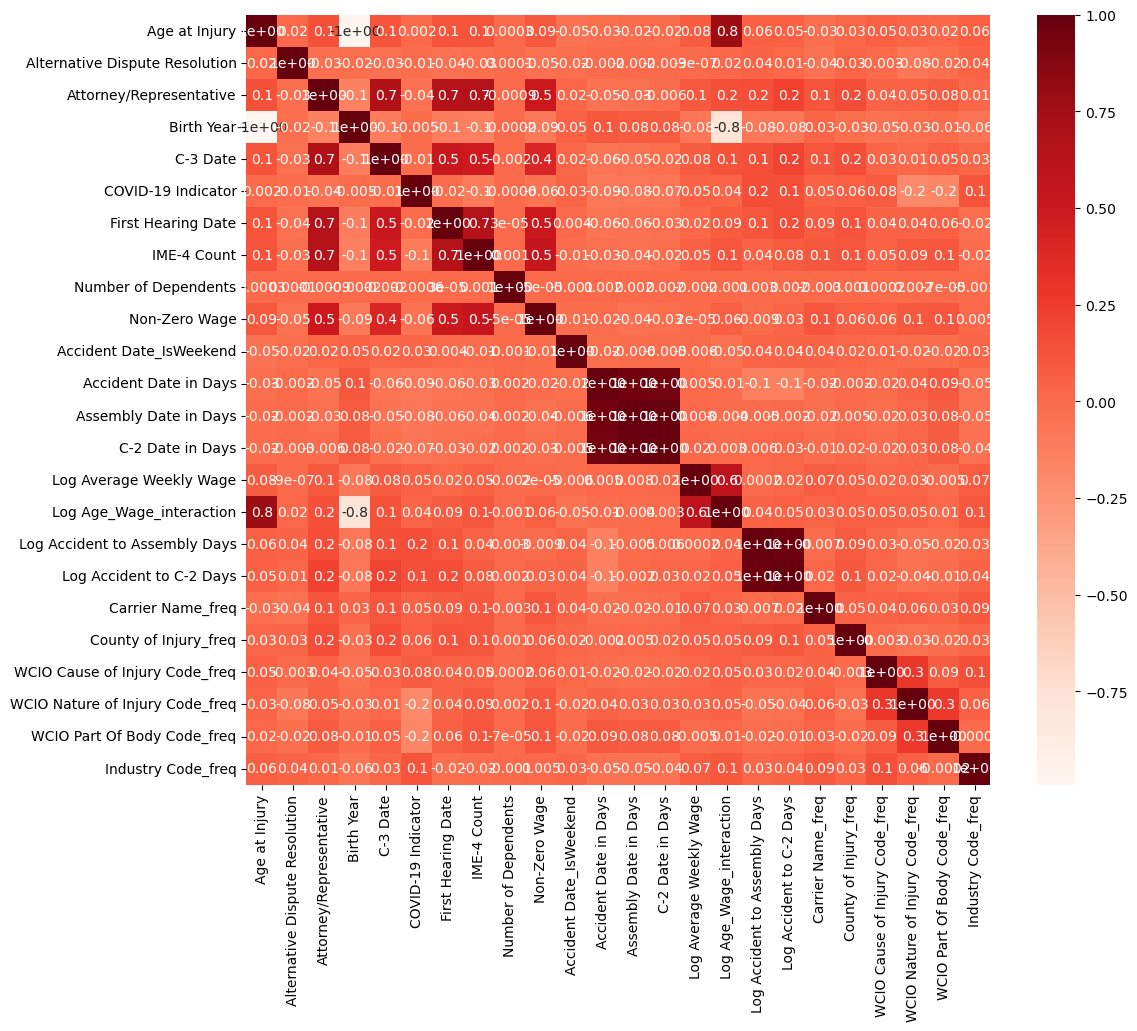

In [37]:
#spearman
cor_spearman = train_without_onehot.corr(method ='spearman')
cor_heatmap(cor_spearman)

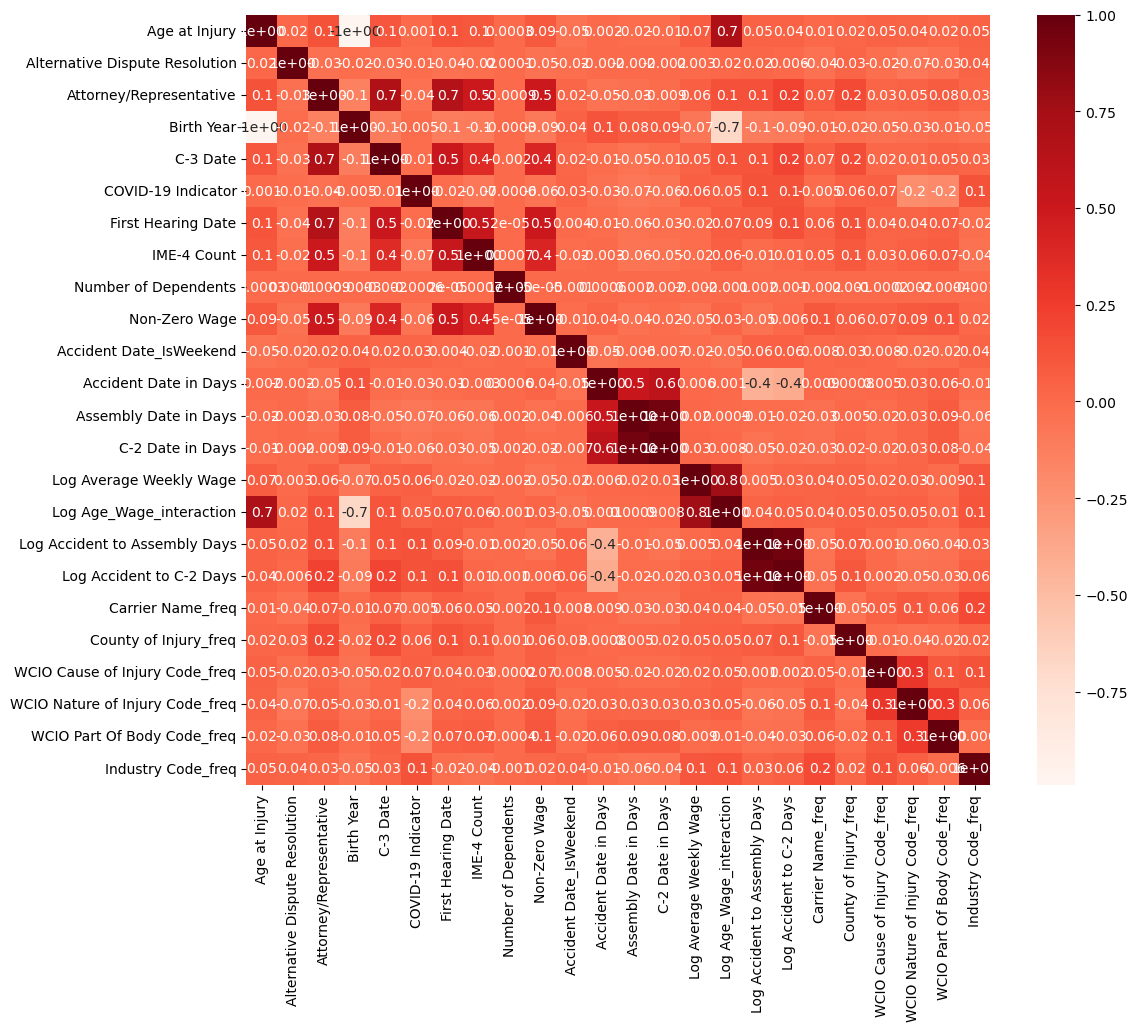

In [38]:
#pearson
cor_pearson = train_without_onehot.corr(method ='pearson')
cor_heatmap(cor_pearson)

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
## Conclusion: Pearson and Spearman Correlations
 
</a>

- The two correlation matrix methods show similar results
- Age at Injury and Birth Year are perfectly correlated (this makes intuintive sense, as age is determined by birth year). We can drop one of these features.
- Accident to C-2 is highly correlated with Accident to Assembly. We can drop one of these features.
- Assembly Date in Days, C-2 Date in Days, and Accident Date in Days are all highly correlated with one another.
- The high correlation between our date features makes intuitive sense, because in most cases, C-2 date, Assembly date, and Accident Date are relatively close to one another. This would mean they are a similar number of days from our reference date (1961-09-06), and a similar number of days between one another. We want to find out which one is the best predictor of Claim Injury Type, and discard the rest.
- Age_Wage_interation is highly positively correlated with Average Weekly Wage and negatively correlated with Birth Year, which makes sense as these are the two features used to create the interaction term.
- First Hearing Date, which we changed to a binary feature, is highly positively correated with Attorney/Representative. This makes sense, as claimants who hire an attorney are more likely to have had a hearing.
- Attorney/Representative is also positively correlated with our binary feature C-3 Date. This is likely because a claimain with an attorney is more likely to file a C-3 form.

To summarize, one of the following in each of the pairs or groups of features can be dropped:
- Age at Injury and Birth Year
- Accident to C-2 and Accident to Assembly
- Assembly Date in Days, C-2 Date in Days, Accident Date in Days
- Age_Wage_interaction, Age at Injury, Birth Year, Average Weekly Wage
- First Hearing Date and Attorney/Representative
- C-3 Date and Attorney/Representative

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="rfe_m">
    
# 5.2.2. Wrapper Methods: Recursive Feature Elimination (RFE)
 
</a>

-RFE is a highly effective strategy for identifying and retaining the most predictive features because it is both model-driven and iterative. Similar to the correlation methods above, we will use numerical features and frequency encoded categorical features.

In [42]:
num_columns = train_without_onehot.shape[1]
print(f"The number of variables (columns) in the section of data we will analyze is: {num_columns}")

The number of variables (columns) in the section of data we will analyze is: 24


To select the optium number of features for our RFE test we will run the following function. 

In [162]:
#first determining the number of features we should keep
nof_list=np.arange(1,24)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression(random_state=42)
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(train_without_onehot,y_train)
    X_val_rfe = rfe.transform(val_without_onehot)
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 12
Score with 12 features: 0.742221


To note: the first (many) times this RFE was run, the result was to select 22 featues. In running the models, we observed that data with a higher number of features seemed to perform better, so we decided to stick with only dropping 2 features. From the plot below, we can see that 12 through 24 all have a similar score, so choosing 22 rather than 12 should not have a particularly large impact.

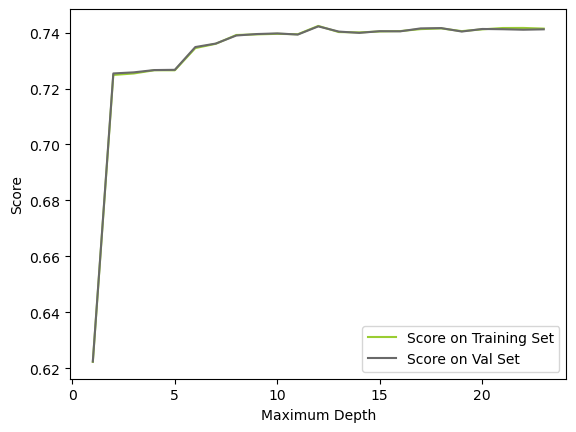

In [164]:
plt.plot(list(range(1,24)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,24)), val_score_list, label="Score on Val Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

In [45]:
modelLR = LogisticRegression()
rfe = RFE(estimator = modelLR, n_features_to_select = 22)
X_rfe = rfe.fit_transform(X = train_without_onehot, y = y_train)
train_without_onehot.columns
rfe.support_
rfe.ranking_
selected_features = pd.Series(rfe.support_, index = train_without_onehot.columns)
selected_features

Age at Injury                       True
Alternative Dispute Resolution      True
Attorney/Representative             True
Birth Year                          True
C-3 Date                            True
COVID-19 Indicator                  True
First Hearing Date                  True
IME-4 Count                         True
Number of Dependents               False
Non-Zero Wage                       True
Accident Date_IsWeekend            False
Accident Date in Days               True
Assembly Date in Days               True
C-2 Date in Days                    True
Log Average Weekly Wage             True
Log Age_Wage_interaction            True
Log Accident to Assembly Days       True
Log Accident to C-2 Days            True
Carrier Name_freq                   True
County of Injury_freq               True
WCIO Cause of Injury Code_freq      True
WCIO Nature of Injury Code_freq     True
WCIO Part Of Body Code_freq         True
Industry Code_freq                  True
dtype: bool

### According to the RFE method, if we want to keep 22 variables, we should discard:
- Number of Dependents
- Accident Date_IsWeekend  

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
## Conclusion: RFE
 
</a>

- We should keep 22 features. The 2 features we should drop are:  
    - Number of Dependents
    - Accident Date_IsWeekend

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="emb_m">
    
## 5.2.3. Embedded Methods: Lasso Regression
 
</a>

Using Lasso Regression in this scenario is an optimal choice because it simplifies the model, automatically selects the most predictive features, handles multicollinearity, and enhances both interpretability and performance. The method’s ability to eliminate variables demonstrates its effectiveness in focusing on the most relevant predictors while discarding noise, making it a powerful tool for feature selection and model building.  
For Lasso Regression, we can use all of our data, including all numerically encoded categorical features (both frequency encoded and one-hot encoded).

In [51]:
#Now trying Lasso Regression
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [52]:
reg = LassoCV()

In [53]:
#fitting data to reg where X is the data and y is the dependent
reg.fit(X_train, y_train)

LassoCV()

In [54]:
# creating an object that has as index X_train columns and has coef_ attribute as value.
coef = pd.Series(reg.coef_, index = X_train.columns)
coef.sort_values()

Accident Date in Days                                      -0.803814
Log Accident to Assembly Days                              -0.724884
Nature of Injury_13.0                                      -0.339354
Part of Body_10.0                                          -0.178793
District Name_STATEWIDE                                    -0.158473
C-2 Date in Days                                           -0.117148
Nature of Injury_4.0                                       -0.091460
Cause of Injury_11.0                                       -0.073967
Cause of Injury_10.0                                       -0.070573
Part of Body_9.0                                           -0.064549
District Name_NYC                                          -0.062284
Nature of Injury_10.0                                      -0.045246
Cause of Injury_4.0                                        -0.042586
Nature of Injury_2.0                                       -0.035207
Part of Body_5.0                  

In [55]:
#how many did Lasso pick and how many did it eliminate?
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 55 variables and eliminated the other 27 variables


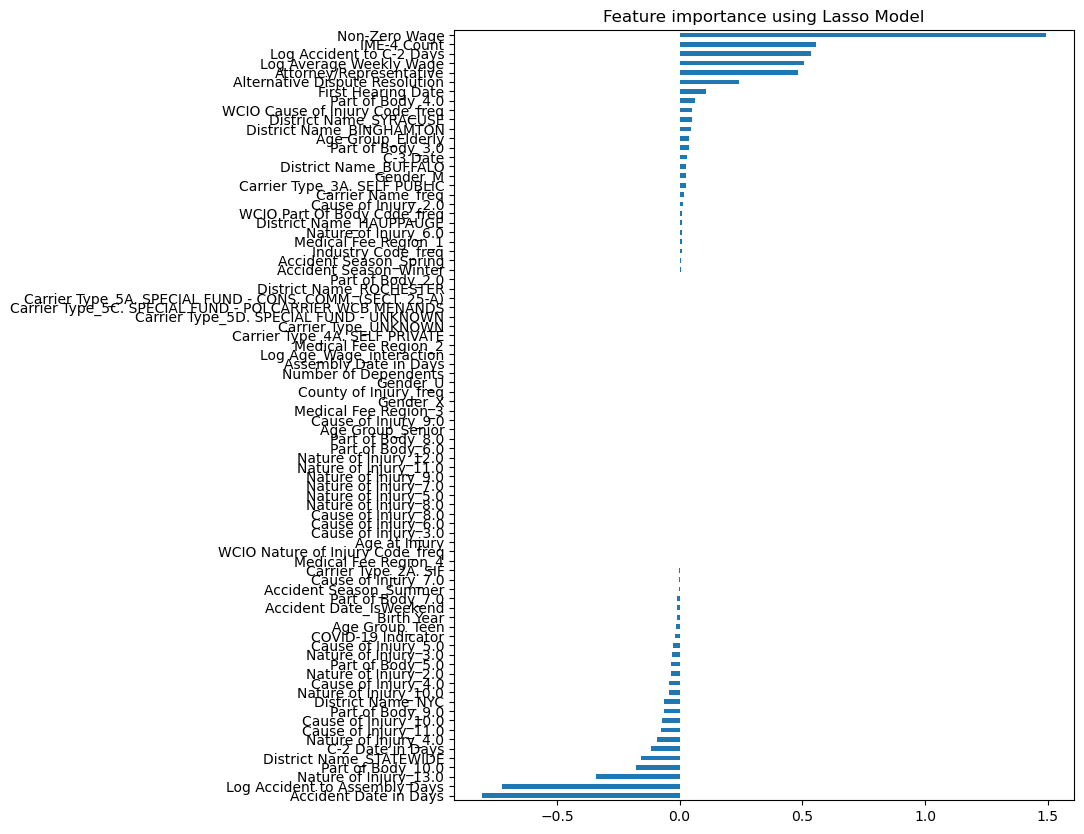

In [56]:
#visualization
plot_importance(coef,'Lasso')

In [57]:
print(coef[coef == 0].index)

Index(['Age at Injury', 'Number of Dependents', 'Assembly Date in Days',
       'Log Age_Wage_interaction', 'County of Injury_freq',
       'Carrier Type_4A. SELF PRIVATE',
       'Carrier Type_5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)',
       'Carrier Type_5C. SPECIAL FUND - POI CARRIER WCB MENANDS',
       'Carrier Type_5D. SPECIAL FUND - UNKNOWN', 'Carrier Type_UNKNOWN',
       'Gender_U', 'Gender_X', 'Medical Fee Region_2', 'Medical Fee Region_3',
       'Cause of Injury_3.0', 'Cause of Injury_6.0', 'Cause of Injury_8.0',
       'Cause of Injury_9.0', 'Nature of Injury_5.0', 'Nature of Injury_7.0',
       'Nature of Injury_8.0', 'Nature of Injury_9.0', 'Nature of Injury_11.0',
       'Nature of Injury_12.0', 'Part of Body_6.0', 'Part of Body_8.0',
       'Age Group_Senior'],
      dtype='object')


<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
## Conclusion: Lasso Regression
 
</a>

Our Lasso Regression assigned a coefficient of 0 to many features. This indicates that the feature is not strongly correlated with the target feature, or has high collinearity with another feature in the dataset. According to the Lasso Regression we should drop the following features:  
- 'Age at Injury'
- 'Birth Year'
- 'Number of Dependents'
- 'Accident to Assembly Days'
- 'Accident to C-2 Days'
- 'Age_Wage_interaction'
- 'County of Injury_freq'
- 'WCIO Nature of Injury Code_freq'
- 'Carrier Type_4A. SELF PRIVATE'
- 'Carrier Type_5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)'
- 'Carrier Type_5C. SPECIAL FUND - POI CARRIER WCB MENANDS'
- 'Carrier Type_5D. SPECIAL FUND - UNKNOWN'
- 'Carrier Type_UNKNOWN'
- 'Gender_U'
- 'Gender_X'
- 'Medical Fee Region_2'
- 'Medical Fee Region_3'
- 'Medical Fee Region_4'
- 'Cause of Injury_3.0'
- 'Cause of Injury_6.0'
- 'Cause of Injury_8.0'
- 'Cause of Injury_9.0'
- 'Nature of Injury_5.0'
- 'Nature of Injury_7.0'
- 'Nature of Injury_8.0'
- 'Nature of Injury_9.0'
- 'Nature of Injury_11.0'
- 'Nature of Injury_12.0'
- 'Part of Body_6.0'
- 'Part of Body_8.0'
  

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="tree">
    
## 5.2.4. Tree Based Classifiers
 
</a>


The following Tree Based Classifiers are ensembled methods, meaning they create multiple trees and aggregate the results to produce the importance values that we see as output. They assign features an importance value based on their ability to decrease impurity/entropy across trees in the ensemble. Both methods are useful in their ability to effectively handles non-linear relationships and excels at identifying and ranking important features. These methods can handle both numerical and encoded categorical features, so we will use our whole dataset. 

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="ex_m">
    
## 5.2.4.1. ExtraTrees Classifier
 
</a>


ExtraTrees uses bootsrapping of data (sampling with replacement) and a subset of features, then choses splits *randomly*, making it more robust to noisy features, of which we have many.

In [63]:
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train, y_train)

print("Features Importance :", et_model.feature_importances_)

et_feat_importances = pd.Series(et_model.feature_importances_, index=X_train.columns)

Features Importance : [2.36464311e-02 1.25688821e-03 6.45579012e-02 2.31830517e-02
 2.35006647e-02 1.66880990e-03 3.71299128e-02 2.29057218e-02
 2.19996363e-02 2.33752386e-01 9.14932326e-03 2.58223161e-02
 2.49333581e-02 2.44673696e-02 3.71536322e-02 2.95176261e-02
 2.59990904e-02 2.73580398e-02 2.35564768e-02 1.97359381e-02
 1.93188810e-02 1.60187877e-02 2.14476887e-02 2.18022034e-02
 4.66164294e-03 9.78826517e-03 5.05894207e-03 1.49670704e-06
 3.23945546e-06 5.29075298e-04 1.22810388e-03 2.54553998e-03
 3.82972374e-03 3.97080690e-03 6.19956257e-03 3.35477366e-03
 1.16314235e-03 3.80957774e-03 1.02421793e-02 9.89319694e-04
 1.66014864e-05 5.04285475e-03 4.80694411e-03 4.79591907e-03
 6.36793699e-03 7.60754640e-03 2.27805547e-03 3.26677864e-03
 4.70189756e-03 3.96195221e-04 1.00018949e-03 4.07629958e-03
 2.54756416e-03 3.30617983e-03 8.06095492e-03 9.22527643e-03
 1.26198426e-03 1.34781169e-03 2.80067865e-04 1.22720589e-03
 3.35941498e-04 2.33334493e-04 6.92621315e-06 4.13540728e-03
 1

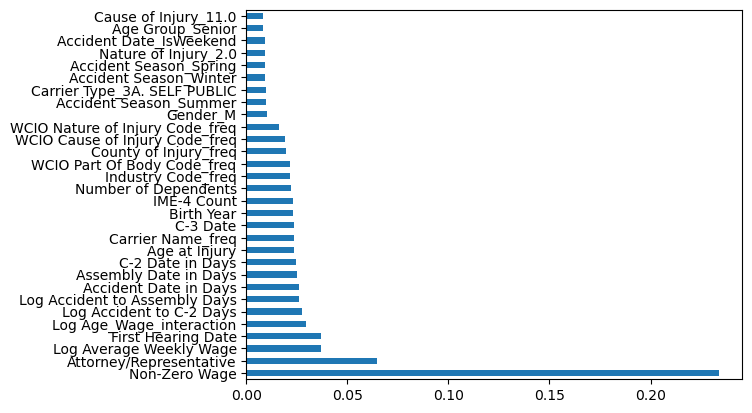

In [64]:
et_feat_importances.nlargest(30).plot(kind='barh')
plt.show()

There are 82 columns in our X_train dataframe. Average importance of each feature is then equal to 1/82 = 0.012. So we will set a threshold of 0.01 to determine importance. If a feature has an importance value below this, it is of below average importance to the model and can be discarded.

In [66]:
print(len(et_feat_importances[et_feat_importances >= 0.01].index))

22


In [67]:
print(len(et_feat_importances[et_feat_importances <= 0.01].index))

60


In [68]:
print(et_feat_importances[et_feat_importances <= 0.01].index)

Index(['Alternative Dispute Resolution', 'COVID-19 Indicator',
       'Accident Date_IsWeekend', 'Carrier Type_2A. SIF',
       'Carrier Type_3A. SELF PUBLIC', 'Carrier Type_4A. SELF PRIVATE',
       'Carrier Type_5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)',
       'Carrier Type_5C. SPECIAL FUND - POI CARRIER WCB MENANDS',
       'Carrier Type_5D. SPECIAL FUND - UNKNOWN', 'Carrier Type_UNKNOWN',
       'District Name_BINGHAMTON', 'District Name_BUFFALO',
       'District Name_HAUPPAUGE', 'District Name_NYC',
       'District Name_ROCHESTER', 'District Name_STATEWIDE',
       'District Name_SYRACUSE', 'Gender_U', 'Gender_X',
       'Medical Fee Region_1', 'Medical Fee Region_2', 'Medical Fee Region_3',
       'Medical Fee Region_4', 'Cause of Injury_2.0', 'Cause of Injury_3.0',
       'Cause of Injury_4.0', 'Cause of Injury_5.0', 'Cause of Injury_6.0',
       'Cause of Injury_7.0', 'Cause of Injury_8.0', 'Cause of Injury_9.0',
       'Cause of Injury_10.0', 'Cause of Injury_11.0', 'Nat

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
## Conclusion: ExtraTrees Classifier
 
</a>

Using an importance threshold of 0.01, ExtraTrees Classifier tells us wee should keep 60 features and discard 22. The features to discard can be seen in the output of the cell above. The features to KEEP are the following:
- 'Age at Injury'
- 'Attorney/Representative'
- 'Average Weekly Wage'
- 'Birth Year'
- 'C-3 Date'
- 'First Hearing Date'
- 'IME-4 Count'
- 'Number of Dependents'
- 'Non-Zero Wage'
- 'Accident to Assembly Days'
- 'Accident to C-2 Days'
- 'Age_Wage_interaction'
- 'Accident Date in Days'
- 'Assembly Date in Days'
- 'C-2 Date in Days'
- 'Carrier Name_freq'
- 'County of Injury_freq'
- 'WCIO Cause of Injury Code_freq'
- 'WCIO Nature of Injury Code_freq'
- 'WCIO Part Of Body Code_freq'
- 'Industry Code_freq'
- 'Gender_M'

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="random_m">
    
## 5.2.4.1. RandomForest Classifier
 
</a>


Random Forest Classifier using bootstrapping (sampling with replacement) in the data and in subsets of features, and selects the *best split* for each feature at every node.

In [72]:
# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)


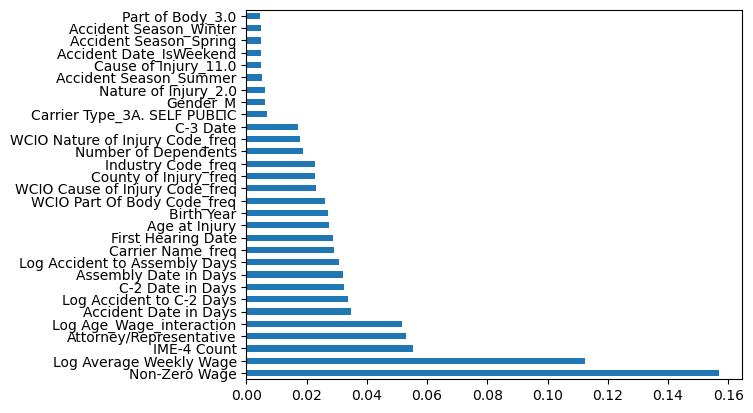

In [73]:
rf_feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [74]:
print(len(rf_feat_importances[rf_feat_importances >= 0.01].index))

21


In [75]:
print(len(rf_feat_importances[rf_feat_importances <= 0.01].index))

61


In [76]:
print(rf_feat_importances[rf_feat_importances <= 0.01].index)

Index(['Alternative Dispute Resolution', 'COVID-19 Indicator',
       'Accident Date_IsWeekend', 'Carrier Type_2A. SIF',
       'Carrier Type_3A. SELF PUBLIC', 'Carrier Type_4A. SELF PRIVATE',
       'Carrier Type_5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)',
       'Carrier Type_5C. SPECIAL FUND - POI CARRIER WCB MENANDS',
       'Carrier Type_5D. SPECIAL FUND - UNKNOWN', 'Carrier Type_UNKNOWN',
       'District Name_BINGHAMTON', 'District Name_BUFFALO',
       'District Name_HAUPPAUGE', 'District Name_NYC',
       'District Name_ROCHESTER', 'District Name_STATEWIDE',
       'District Name_SYRACUSE', 'Gender_M', 'Gender_U', 'Gender_X',
       'Medical Fee Region_1', 'Medical Fee Region_2', 'Medical Fee Region_3',
       'Medical Fee Region_4', 'Cause of Injury_2.0', 'Cause of Injury_3.0',
       'Cause of Injury_4.0', 'Cause of Injury_5.0', 'Cause of Injury_6.0',
       'Cause of Injury_7.0', 'Cause of Injury_8.0', 'Cause of Injury_9.0',
       'Cause of Injury_10.0', 'Cause of Injury

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
## Conclusion: RandomForest Classifier
 
</a>

Using an importance threshold of 0.01, ExtraTrees Classifier tells us wee should keep 61 features and discard 21. The features to discard can be seen in the output of the cell above. This output is nearly identical to the ExtraTrees Classifier, which 

The features to KEEP are the following:

- 'Age at Injury'
- 'Attorney/Representative'
- 'Average Weekly Wage'
- 'Birth Year'
- 'C-3 Date'
- 'First Hearing Date'
- 'IME-4 Count'
- 'Number of Dependents'
- 'Non-Zero Wage'
- 'Accident to Assembly Days'
- 'Accident to C-2 Days'
- 'Age_Wage_interaction'
- 'Accident Date in Days'
- 'Assembly Date in Days'
- 'C-2 Date in Days'
- 'Carrier Name_freq'
- 'County of Injury_freq'
- 'WCIO Cause of Injury Code_freq'
- 'WCIO Nature of Injury Code_freq'
- 'WCIO Part Of Body Code_freq'
- 'Industry Code_freq'

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id = 'insights'>
    
# **5.3. Final Insights**
 
</a>

In [79]:
summary = {
    "Low Variance Filter": [
        "Carrier Type_5A", "Carrier Type_5C", "Gender_X", "Nature of Injury_9.0"],
    "Correlation Analysis": [
        "Age at Injury or Birth Year",
        "Accident to C-2 or Accident to Assembly Days",
        "Assembly Date in Days, C-2 Date in Days, Accident Date in Days",
        "Age_Wage_interaction or Average Weekly Wage",
        "First Hearing Date or Attorney/Representative",],
    "RFE": [
        "Number of Dependents", "Accident Date_IsWeekend"],
    "Lasso Regression": [
        'Age at Injury', 'Number of Dependents', 'Assembly Date in Days',
       'Log Age_Wage_interaction', 'County of Injury_freq',
       'Carrier Type_4A. SELF PRIVATE',
       'Carrier Type_5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)',
       'Carrier Type_5C. SPECIAL FUND - POI CARRIER WCB MENANDS',
       'Carrier Type_5D. SPECIAL FUND - UNKNOWN', 'Carrier Type_UNKNOWN',
       'Gender_U', 'Gender_X', 'Medical Fee Region_2', 'Medical Fee Region_3',
       'Cause of Injury_3.0', 'Cause of Injury_6.0', 'Cause of Injury_8.0',
       'Cause of Injury_9.0', 'Nature of Injury_5.0', 'Nature of Injury_7.0',
       'Nature of Injury_8.0', 'Nature of Injury_9.0', 'Nature of Injury_11.0',
       'Nature of Injury_12.0', 'Part of Body_6.0', 'Part of Body_8.0',
       'Age Group_Senior'],
    "Extra Trees Classifier": [
        'Alternative Dispute Resolution', 'COVID-19 Indicator',
       'Accident Date_IsWeekend', 'Carrier Type_2A. SIF',
       'Carrier Type_3A. SELF PUBLIC', 'Carrier Type_4A. SELF PRIVATE',
       'Carrier Type_5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)',
       'Carrier Type_5C. SPECIAL FUND - POI CARRIER WCB MENANDS',
       'Carrier Type_5D. SPECIAL FUND - UNKNOWN', 'Carrier Type_UNKNOWN',
       'District Name_BINGHAMTON', 'District Name_BUFFALO',
       'District Name_HAUPPAUGE', 'District Name_NYC',
       'District Name_ROCHESTER', 'District Name_STATEWIDE',
       'District Name_SYRACUSE', 'Gender_U', 'Gender_X',
       'Medical Fee Region_1', 'Medical Fee Region_2', 'Medical Fee Region_3',
       'Medical Fee Region_4', 'Cause of Injury_2.0', 'Cause of Injury_3.0',
       'Cause of Injury_4.0', 'Cause of Injury_5.0', 'Cause of Injury_6.0',
       'Cause of Injury_7.0', 'Cause of Injury_8.0', 'Cause of Injury_9.0',
       'Cause of Injury_10.0', 'Cause of Injury_11.0', 'Nature of Injury_2.0',
       'Nature of Injury_3.0', 'Nature of Injury_4.0', 'Nature of Injury_5.0',
       'Nature of Injury_6.0', 'Nature of Injury_7.0', 'Nature of Injury_8.0',
       'Nature of Injury_9.0', 'Nature of Injury_10.0',
       'Nature of Injury_11.0', 'Nature of Injury_12.0',
       'Nature of Injury_13.0', 'Part of Body_2.0', 'Part of Body_3.0',
       'Part of Body_4.0', 'Part of Body_5.0', 'Part of Body_6.0',
       'Part of Body_7.0', 'Part of Body_8.0', 'Part of Body_9.0',
       'Part of Body_10.0', 'Age Group_Elderly', 'Age Group_Senior',
       'Age Group_Teen', 'Accident Season_Spring', 'Accident Season_Summer',
       'Accident Season_Winter'],
    "Random Forest Classifier": [
        'Alternative Dispute Resolution', 'COVID-19 Indicator',
       'Accident Date_IsWeekend', 'Carrier Type_2A. SIF',
       'Carrier Type_3A. SELF PUBLIC', 'Carrier Type_4A. SELF PRIVATE',
       'Carrier Type_5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)',
       'Carrier Type_5C. SPECIAL FUND - POI CARRIER WCB MENANDS',
       'Carrier Type_5D. SPECIAL FUND - UNKNOWN', 'Carrier Type_UNKNOWN',
       'District Name_BINGHAMTON', 'District Name_BUFFALO',
       'District Name_HAUPPAUGE', 'District Name_NYC',
       'District Name_ROCHESTER', 'District Name_STATEWIDE',
       'District Name_SYRACUSE', 'Gender_M', 'Gender_U', 'Gender_X',
       'Medical Fee Region_1', 'Medical Fee Region_2', 'Medical Fee Region_3',
       'Medical Fee Region_4', 'Cause of Injury_2.0', 'Cause of Injury_3.0',
       'Cause of Injury_4.0', 'Cause of Injury_5.0', 'Cause of Injury_6.0',
       'Cause of Injury_7.0', 'Cause of Injury_8.0', 'Cause of Injury_9.0',
       'Cause of Injury_10.0', 'Cause of Injury_11.0', 'Nature of Injury_2.0',
       'Nature of Injury_3.0', 'Nature of Injury_4.0', 'Nature of Injury_5.0',
       'Nature of Injury_6.0', 'Nature of Injury_7.0', 'Nature of Injury_8.0',
       'Nature of Injury_9.0', 'Nature of Injury_10.0',
       'Nature of Injury_11.0', 'Nature of Injury_12.0',
       'Nature of Injury_13.0', 'Part of Body_2.0', 'Part of Body_3.0',
       'Part of Body_4.0', 'Part of Body_5.0', 'Part of Body_6.0',
       'Part of Body_7.0', 'Part of Body_8.0', 'Part of Body_9.0',
       'Part of Body_10.0', 'Age Group_Elderly', 'Age Group_Senior',
       'Age Group_Teen', 'Accident Season_Spring', 'Accident Season_Summer',
       'Accident Season_Winter'],
    "Chi-Square": ["No features marked for removal"]
}

# Display the summary in a markdown format
display(Markdown("### Feature Selection Results"))
for method, features in summary.items():
    display(Markdown(f"**{method}:**"))
    display(Markdown(f"- " + "\n- ".join(features)))



### Feature Selection Results

**Low Variance Filter:**

- Carrier Type_5A
- Carrier Type_5C
- Gender_X
- Nature of Injury_9.0

**Correlation Analysis:**

- Age at Injury or Birth Year
- Accident to C-2 or Accident to Assembly Days
- Assembly Date in Days, C-2 Date in Days, Accident Date in Days
- Age_Wage_interaction or Average Weekly Wage
- First Hearing Date or Attorney/Representative

**RFE:**

- Number of Dependents
- Accident Date_IsWeekend

**Lasso Regression:**

- Age at Injury
- Number of Dependents
- Assembly Date in Days
- Log Age_Wage_interaction
- County of Injury_freq
- Carrier Type_4A. SELF PRIVATE
- Carrier Type_5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)
- Carrier Type_5C. SPECIAL FUND - POI CARRIER WCB MENANDS
- Carrier Type_5D. SPECIAL FUND - UNKNOWN
- Carrier Type_UNKNOWN
- Gender_U
- Gender_X
- Medical Fee Region_2
- Medical Fee Region_3
- Cause of Injury_3.0
- Cause of Injury_6.0
- Cause of Injury_8.0
- Cause of Injury_9.0
- Nature of Injury_5.0
- Nature of Injury_7.0
- Nature of Injury_8.0
- Nature of Injury_9.0
- Nature of Injury_11.0
- Nature of Injury_12.0
- Part of Body_6.0
- Part of Body_8.0
- Age Group_Senior

**Extra Trees Classifier:**

- Alternative Dispute Resolution
- COVID-19 Indicator
- Accident Date_IsWeekend
- Carrier Type_2A. SIF
- Carrier Type_3A. SELF PUBLIC
- Carrier Type_4A. SELF PRIVATE
- Carrier Type_5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)
- Carrier Type_5C. SPECIAL FUND - POI CARRIER WCB MENANDS
- Carrier Type_5D. SPECIAL FUND - UNKNOWN
- Carrier Type_UNKNOWN
- District Name_BINGHAMTON
- District Name_BUFFALO
- District Name_HAUPPAUGE
- District Name_NYC
- District Name_ROCHESTER
- District Name_STATEWIDE
- District Name_SYRACUSE
- Gender_U
- Gender_X
- Medical Fee Region_1
- Medical Fee Region_2
- Medical Fee Region_3
- Medical Fee Region_4
- Cause of Injury_2.0
- Cause of Injury_3.0
- Cause of Injury_4.0
- Cause of Injury_5.0
- Cause of Injury_6.0
- Cause of Injury_7.0
- Cause of Injury_8.0
- Cause of Injury_9.0
- Cause of Injury_10.0
- Cause of Injury_11.0
- Nature of Injury_2.0
- Nature of Injury_3.0
- Nature of Injury_4.0
- Nature of Injury_5.0
- Nature of Injury_6.0
- Nature of Injury_7.0
- Nature of Injury_8.0
- Nature of Injury_9.0
- Nature of Injury_10.0
- Nature of Injury_11.0
- Nature of Injury_12.0
- Nature of Injury_13.0
- Part of Body_2.0
- Part of Body_3.0
- Part of Body_4.0
- Part of Body_5.0
- Part of Body_6.0
- Part of Body_7.0
- Part of Body_8.0
- Part of Body_9.0
- Part of Body_10.0
- Age Group_Elderly
- Age Group_Senior
- Age Group_Teen
- Accident Season_Spring
- Accident Season_Summer
- Accident Season_Winter

**Random Forest Classifier:**

- Alternative Dispute Resolution
- COVID-19 Indicator
- Accident Date_IsWeekend
- Carrier Type_2A. SIF
- Carrier Type_3A. SELF PUBLIC
- Carrier Type_4A. SELF PRIVATE
- Carrier Type_5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)
- Carrier Type_5C. SPECIAL FUND - POI CARRIER WCB MENANDS
- Carrier Type_5D. SPECIAL FUND - UNKNOWN
- Carrier Type_UNKNOWN
- District Name_BINGHAMTON
- District Name_BUFFALO
- District Name_HAUPPAUGE
- District Name_NYC
- District Name_ROCHESTER
- District Name_STATEWIDE
- District Name_SYRACUSE
- Gender_M
- Gender_U
- Gender_X
- Medical Fee Region_1
- Medical Fee Region_2
- Medical Fee Region_3
- Medical Fee Region_4
- Cause of Injury_2.0
- Cause of Injury_3.0
- Cause of Injury_4.0
- Cause of Injury_5.0
- Cause of Injury_6.0
- Cause of Injury_7.0
- Cause of Injury_8.0
- Cause of Injury_9.0
- Cause of Injury_10.0
- Cause of Injury_11.0
- Nature of Injury_2.0
- Nature of Injury_3.0
- Nature of Injury_4.0
- Nature of Injury_5.0
- Nature of Injury_6.0
- Nature of Injury_7.0
- Nature of Injury_8.0
- Nature of Injury_9.0
- Nature of Injury_10.0
- Nature of Injury_11.0
- Nature of Injury_12.0
- Nature of Injury_13.0
- Part of Body_2.0
- Part of Body_3.0
- Part of Body_4.0
- Part of Body_5.0
- Part of Body_6.0
- Part of Body_7.0
- Part of Body_8.0
- Part of Body_9.0
- Part of Body_10.0
- Age Group_Elderly
- Age Group_Senior
- Age Group_Teen
- Accident Season_Spring
- Accident Season_Summer
- Accident Season_Winter

**Chi-Square:**

- No features marked for removal

Synthesizing the results above, we will discard the features below. The choices were made taking into account output of each individual selection method, and by analysing where there was overlap in conclusions of multiple feature selection methods.

In [81]:
features_to_discard = [
    "Accident Date_IsWeekend",
    "Age Group_Senior",
    "Age at Injury",
    "Assembly Date in Days",
    "Carrier Type_4A. SELF PRIVATE",
    "Carrier Type_5A. SPECIAL FUND – CONS. COMM. (SECT. 25-A)",
    "Carrier Type_5C. SPECIAL FUND – POI CARRIER WCB MENANDS",
    "Carrier Type_5D. SPECIAL FUND – UNKNOWN",
    "Cause of Injury_3.0",
    "Cause of Injury_9.0",
    "County of Injury_freq",
    "Gender_U",
    "Gender_X",
    "Log Age_Wage_interaction",
    "Medical Fee Region_2",
    "Medical Fee Region_3",
    "Nature of Injury_12.0",
    "Nature of Injury_5.0",
    "Nature of Injury_8.0",
    "Nature of Injury_9.0",
    "Number of Dependents",
    "Part of Body_6.0",
    "Part of Body_8.0"
]


In [82]:
#to avoid key errors
features_to_discard = [feature for feature in features_to_discard if feature in X_train.columns]

In [83]:
for feature in features_to_discard:
    X_train.drop(columns = feature, axis=1, inplace=True)
    X_val.drop(columns = feature, axis=1, inplace=True)
    df_test.drop(columns = feature, axis=1, inplace=True)


In [84]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459181 entries, 5785935 to 6027959
Data columns (total 62 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   Alternative Dispute Resolution                            459181 non-null  int64  
 1   Attorney/Representative                                   459181 non-null  int64  
 2   Birth Year                                                459181 non-null  float64
 3   C-3 Date                                                  459181 non-null  int64  
 4   COVID-19 Indicator                                        459181 non-null  int64  
 5   First Hearing Date                                        459181 non-null  int64  
 6   IME-4 Count                                               459181 non-null  float64
 7   Non-Zero Wage                                             459181 non-null  int64  
 8   Ac

In [85]:
X_train.head()

,Alternative Dispute Resolution,Attorney/Representative,Birth Year,C-3 Date,COVID-19 Indicator,First Hearing Date,IME-4 Count,Non-Zero Wage,Accident Date in Days,C-2 Date in Days,Log Average Weekly Wage,Log Accident to Assembly Days,Log Accident to C-2 Days,Carrier Name_freq,WCIO Cause of Injury Code_freq,WCIO Nature of Injury Code_freq,WCIO Part Of Body Code_freq,Industry Code_freq,Carrier Type_2A. SIF,Carrier Type_3A. SELF PUBLIC,Carrier Type_5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A),Carrier Type_5C. SPECIAL FUND - POI CARRIER WCB MENANDS,Carrier Type_5D. SPECIAL FUND - UNKNOWN,Carrier Type_UNKNOWN,District Name_BINGHAMTON,District Name_BUFFALO,District Name_HAUPPAUGE,District Name_NYC,District Name_ROCHESTER,District Name_STATEWIDE,District Name_SYRACUSE,Gender_M,Medical Fee Region_1,Medical Fee Region_4,Cause of Injury_2.0,Cause of Injury_4.0,Cause of Injury_5.0,Cause of Injury_6.0,Cause of Injury_7.0,Cause of Injury_8.0,Cause of Injury_10.0,Cause of Injury_11.0,Nature of Injury_2.0,Nature of Injury_3.0,Nature of Injury_4.0,Nature of Injury_6.0,Nature of Injury_7.0,Nature of Injury_10.0,Nature of Injury_11.0,Nature of Injury_13.0,Part of Body_2.0,Part of Body_3.0,Part of Body_4.0,Part of Body_5.0,Part of Body_7.0,Part of Body_9.0,Part of Body_10.0,Age Group_Elderly,Age Group_Teen,Accident Season_Spring,Accident Season_Summer,Accident Season_Winter
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5785935,0,1,0.500000,1,0,0,0.057143,1,0.911370,0.666233,0.635703,0.198291,0.197947,0.019880,0.629123,0.235767,1.000000,0.080973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6090033,0,1,0.430556,1,0,1,0.200000,1,0.958170,0.798634,0.656418,0.230129,0.229729,0.004258,0.358440,1.000000,0.114575,0.306909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6136197,0,0,0.541667,0,0,0,0.000000,0,0.964410,0.817502,0.694729,0.275001,0.274524,0.154082,0.233292,0.719460,0.037385,0.306909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6019545,0,0,0.416667,1,0,0,0.000000,0,0.872429,0.768705,0.694729,0.718151,0.716905,0.115100,0.711427,0.018245,0.362997,0.253377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5792247,0,1,0.458333,1,0,1,0.000000,1,0.912295,0.668835,0.618212,0.198291,0.197947,1.000000,0.629123,0.719460,0.264914,0.358502,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [86]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114796 entries, 5947783 to 6076050
Data columns (total 62 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   Alternative Dispute Resolution                            114796 non-null  int64  
 1   Attorney/Representative                                   114796 non-null  int64  
 2   Birth Year                                                114796 non-null  float64
 3   C-3 Date                                                  114796 non-null  int64  
 4   COVID-19 Indicator                                        114796 non-null  int64  
 5   First Hearing Date                                        114796 non-null  int64  
 6   IME-4 Count                                               114796 non-null  float64
 7   Non-Zero Wage                                             114796 non-null  int64  
 8   Ac

In [87]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387975 entries, 6165911 to 6553594
Data columns (total 62 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   Alternative Dispute Resolution                            387975 non-null  int64  
 1   Attorney/Representative                                   387975 non-null  int64  
 2   Birth Year                                                387975 non-null  float64
 3   C-3 Date                                                  387975 non-null  int64  
 4   COVID-19 Indicator                                        387975 non-null  int64  
 5   First Hearing Date                                        387975 non-null  int64  
 6   IME-4 Count                                               387975 non-null  float64
 7   Non-Zero Wage                                             387975 non-null  int64  
 8   Ac

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="exports">
    
# 5.3 CSV Formatting, Exports
 
</a>

In [89]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print('df_test shape:', df_test.shape)

X_train shape: (459181, 62)
X_val shape: (114796, 62)
df_test shape: (387975, 62)


In [90]:
#rejoining X and y to ensure indices are still matched when we re-import
#ensuring y_train is a Series
y_train = pd.Series(y_train)
y_val = pd.Series(y_val)

#joing dfs
df_train_fs = pd.concat([X_train, y_train], axis=1)
df_val_fs = pd.concat([X_val, y_val], axis=1)

In [91]:
df_train_fs.head()

,Alternative Dispute Resolution,Attorney/Representative,Birth Year,C-3 Date,COVID-19 Indicator,First Hearing Date,IME-4 Count,Non-Zero Wage,Accident Date in Days,C-2 Date in Days,Log Average Weekly Wage,Log Accident to Assembly Days,Log Accident to C-2 Days,Carrier Name_freq,WCIO Cause of Injury Code_freq,WCIO Nature of Injury Code_freq,WCIO Part Of Body Code_freq,Industry Code_freq,Carrier Type_2A. SIF,Carrier Type_3A. SELF PUBLIC,Carrier Type_5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A),Carrier Type_5C. SPECIAL FUND - POI CARRIER WCB MENANDS,Carrier Type_5D. SPECIAL FUND - UNKNOWN,Carrier Type_UNKNOWN,District Name_BINGHAMTON,District Name_BUFFALO,District Name_HAUPPAUGE,District Name_NYC,District Name_ROCHESTER,District Name_STATEWIDE,District Name_SYRACUSE,Gender_M,Medical Fee Region_1,Medical Fee Region_4,Cause of Injury_2.0,Cause of Injury_4.0,Cause of Injury_5.0,Cause of Injury_6.0,Cause of Injury_7.0,Cause of Injury_8.0,Cause of Injury_10.0,Cause of Injury_11.0,Nature of Injury_2.0,Nature of Injury_3.0,Nature of Injury_4.0,Nature of Injury_6.0,Nature of Injury_7.0,Nature of Injury_10.0,Nature of Injury_11.0,Nature of Injury_13.0,Part of Body_2.0,Part of Body_3.0,Part of Body_4.0,Part of Body_5.0,Part of Body_7.0,Part of Body_9.0,Part of Body_10.0,Age Group_Elderly,Age Group_Teen,Accident Season_Spring,Accident Season_Summer,Accident Season_Winter,Claim Injury Type
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5785935,0,1,0.500000,1,0,0,0.057143,1,0.911370,0.666233,0.635703,0.198291,0.197947,0.019880,0.629123,0.235767,1.000000,0.080973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
6090033,0,1,0.430556,1,0,1,0.200000,1,0.958170,0.798634,0.656418,0.230129,0.229729,0.004258,0.358440,1.000000,0.114575,0.306909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
6136197,0,0,0.541667,0,0,0,0.000000,0,0.964410,0.817502,0.694729,0.275001,0.274524,0.154082,0.233292,0.719460,0.037385,0.306909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6019545,0,0,0.416667,1,0,0,0.000000,0,0.872429,0.768705,0.694729,0.718151,0.716905,0.115100,0.711427,0.018245,0.362997,0.253377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
5792247,0,1,0.458333,1,0,1,0.000000,1,0.912295,0.668835,0.618212,0.198291,0.197947,1.000000,0.629123,0.719460,0.264914,0.358502,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3


In [92]:
df_train_fs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459181 entries, 5785935 to 6027959
Data columns (total 63 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   Alternative Dispute Resolution                            459181 non-null  int64  
 1   Attorney/Representative                                   459181 non-null  int64  
 2   Birth Year                                                459181 non-null  float64
 3   C-3 Date                                                  459181 non-null  int64  
 4   COVID-19 Indicator                                        459181 non-null  int64  
 5   First Hearing Date                                        459181 non-null  int64  
 6   IME-4 Count                                               459181 non-null  float64
 7   Non-Zero Wage                                             459181 non-null  int64  
 8   Ac

In [93]:
df_val_fs.head()

,Alternative Dispute Resolution,Attorney/Representative,Birth Year,C-3 Date,COVID-19 Indicator,First Hearing Date,IME-4 Count,Non-Zero Wage,Accident Date in Days,C-2 Date in Days,Log Average Weekly Wage,Log Accident to Assembly Days,Log Accident to C-2 Days,Carrier Name_freq,WCIO Cause of Injury Code_freq,WCIO Nature of Injury Code_freq,WCIO Part Of Body Code_freq,Industry Code_freq,Carrier Type_2A. SIF,Carrier Type_3A. SELF PUBLIC,Carrier Type_5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A),Carrier Type_5C. SPECIAL FUND - POI CARRIER WCB MENANDS,Carrier Type_5D. SPECIAL FUND - UNKNOWN,Carrier Type_UNKNOWN,District Name_BINGHAMTON,District Name_BUFFALO,District Name_HAUPPAUGE,District Name_NYC,District Name_ROCHESTER,District Name_STATEWIDE,District Name_SYRACUSE,Gender_M,Medical Fee Region_1,Medical Fee Region_4,Cause of Injury_2.0,Cause of Injury_4.0,Cause of Injury_5.0,Cause of Injury_6.0,Cause of Injury_7.0,Cause of Injury_8.0,Cause of Injury_10.0,Cause of Injury_11.0,Nature of Injury_2.0,Nature of Injury_3.0,Nature of Injury_4.0,Nature of Injury_6.0,Nature of Injury_7.0,Nature of Injury_10.0,Nature of Injury_11.0,Nature of Injury_13.0,Part of Body_2.0,Part of Body_3.0,Part of Body_4.0,Part of Body_5.0,Part of Body_7.0,Part of Body_9.0,Part of Body_10.0,Age Group_Elderly,Age Group_Teen,Accident Season_Spring,Accident Season_Summer,Accident Season_Winter,Claim Injury Type
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5947783,0,0,0.486111,1,0,0,0.000000,0,0.936908,0.739102,0.694729,0.243164,0.242742,0.000023,0.257870,0.719460,0.810727,0.365411,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3
6150876,0,1,0.361111,0,0,1,0.028571,1,0.967298,0.824333,0.694729,0.230129,0.229729,1.000000,1.000000,1.000000,0.729113,0.306909,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
5397365,0,1,0.361111,0,0,0,0.000000,0,0.483245,0.477228,0.694729,0.890783,0.889202,0.001126,0.257870,0.362903,0.481247,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
6077399,0,1,0.444444,1,0,1,0.142857,1,0.932863,0.796031,0.749867,0.593327,0.595366,1.000000,0.258811,0.719460,0.810727,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5
5945251,0,0,0.708333,0,0,0,0.000000,0,0.937023,0.737150,0.694729,0.076710,0.076576,0.125225,0.711427,1.000000,0.156313,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2


In [94]:
df_val_fs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114796 entries, 5947783 to 6076050
Data columns (total 63 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   Alternative Dispute Resolution                            114796 non-null  int64  
 1   Attorney/Representative                                   114796 non-null  int64  
 2   Birth Year                                                114796 non-null  float64
 3   C-3 Date                                                  114796 non-null  int64  
 4   COVID-19 Indicator                                        114796 non-null  int64  
 5   First Hearing Date                                        114796 non-null  int64  
 6   IME-4 Count                                               114796 non-null  float64
 7   Non-Zero Wage                                             114796 non-null  int64  
 8   Ac

In [95]:
#renaming X_train, X_val and df_test to be their original names
df_train_log_minmax_fs = df_train_fs.copy()
df_val_log_minmax_fs = df_val_fs.copy()
df_test_log_minmax_fs = df_test.copy()

In [96]:
df_train_log_minmax_fs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459181 entries, 5785935 to 6027959
Data columns (total 63 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   Alternative Dispute Resolution                            459181 non-null  int64  
 1   Attorney/Representative                                   459181 non-null  int64  
 2   Birth Year                                                459181 non-null  float64
 3   C-3 Date                                                  459181 non-null  int64  
 4   COVID-19 Indicator                                        459181 non-null  int64  
 5   First Hearing Date                                        459181 non-null  int64  
 6   IME-4 Count                                               459181 non-null  float64
 7   Non-Zero Wage                                             459181 non-null  int64  
 8   Ac

In [97]:
df_val_log_minmax_fs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114796 entries, 5947783 to 6076050
Data columns (total 63 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   Alternative Dispute Resolution                            114796 non-null  int64  
 1   Attorney/Representative                                   114796 non-null  int64  
 2   Birth Year                                                114796 non-null  float64
 3   C-3 Date                                                  114796 non-null  int64  
 4   COVID-19 Indicator                                        114796 non-null  int64  
 5   First Hearing Date                                        114796 non-null  int64  
 6   IME-4 Count                                               114796 non-null  float64
 7   Non-Zero Wage                                             114796 non-null  int64  
 8   Ac

In [98]:
df_test_log_minmax_fs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387975 entries, 6165911 to 6553594
Data columns (total 62 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   Alternative Dispute Resolution                            387975 non-null  int64  
 1   Attorney/Representative                                   387975 non-null  int64  
 2   Birth Year                                                387975 non-null  float64
 3   C-3 Date                                                  387975 non-null  int64  
 4   COVID-19 Indicator                                        387975 non-null  int64  
 5   First Hearing Date                                        387975 non-null  int64  
 6   IME-4 Count                                               387975 non-null  float64
 7   Non-Zero Wage                                             387975 non-null  int64  
 8   Ac

In [99]:
#saving the data frames

#minmax
df_train_log_minmax_fs.to_csv('df_train_log_minmax_fs.csv', index = True)
df_val_log_minmax_fs.to_csv('df_val_log_minmax_fs.csv', index = True)
df_test_log_minmax_fs.to_csv('df_test_log_minmax_fs.csv', index = True)
